In [ ]:
# 201704028 조 종운

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
wine_data = pd.read_csv('./data/wine.csv', delimiter=',', dtype=float, header=None)
wine_data.columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'class']

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,1.0


In [4]:
x_data = wine_data.iloc[:, 0:-1]
x_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [5]:
y_data = wine_data.iloc[:, -1]
y_data

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
6467    0.0
6468    0.0
6469    0.0
6470    0.0
6471    0.0
6472    0.0
6473    0.0
6474    0.0
6475    0.0
6476    0.0
6477    0.0
6478    0.0
6479    0.0
6480    0.0
6481    0.0
6482    0.0
6483    0.0
6484    0.0
6485    0.0
6486    0.0
6487    0.0
6488    0.0
6489    0.0
6490    0.0
6491    0.0
6492    0.0
6493    0.0
6494    0.0
6495    0.0
6496    0.0
Name: class, Length: 6497, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.tree import DecisionTreeClassifier

train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size = 0.3, random_state=42)
print(train_x.shape)
print(test_x.shape)

(4547, 12)
(1950, 12)


In [7]:
wine_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, splitter='random')
wine_tree.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [8]:
y_pred_train = wine_tree.predict(train_x)
y_pred_test = wine_tree.predict(test_x)

print("Train Data: ", accuracy_score(train_y, y_pred_train))
print("Test Data: ", accuracy_score(test_y, y_pred_test))

Train Data:  0.9637123378051462
Test Data:  0.9564102564102565


In [9]:
from sklearn.metrics import classification_report

y_true, y_pred = test_y, wine_tree.predict(test_x)
print(classification_report(y_true, y_pred))

precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1448
         1.0       0.96      0.87      0.91       502

   micro avg       0.96      0.96      0.96      1950
   macro avg       0.96      0.93      0.94      1950
weighted avg       0.96      0.96      0.96      1950



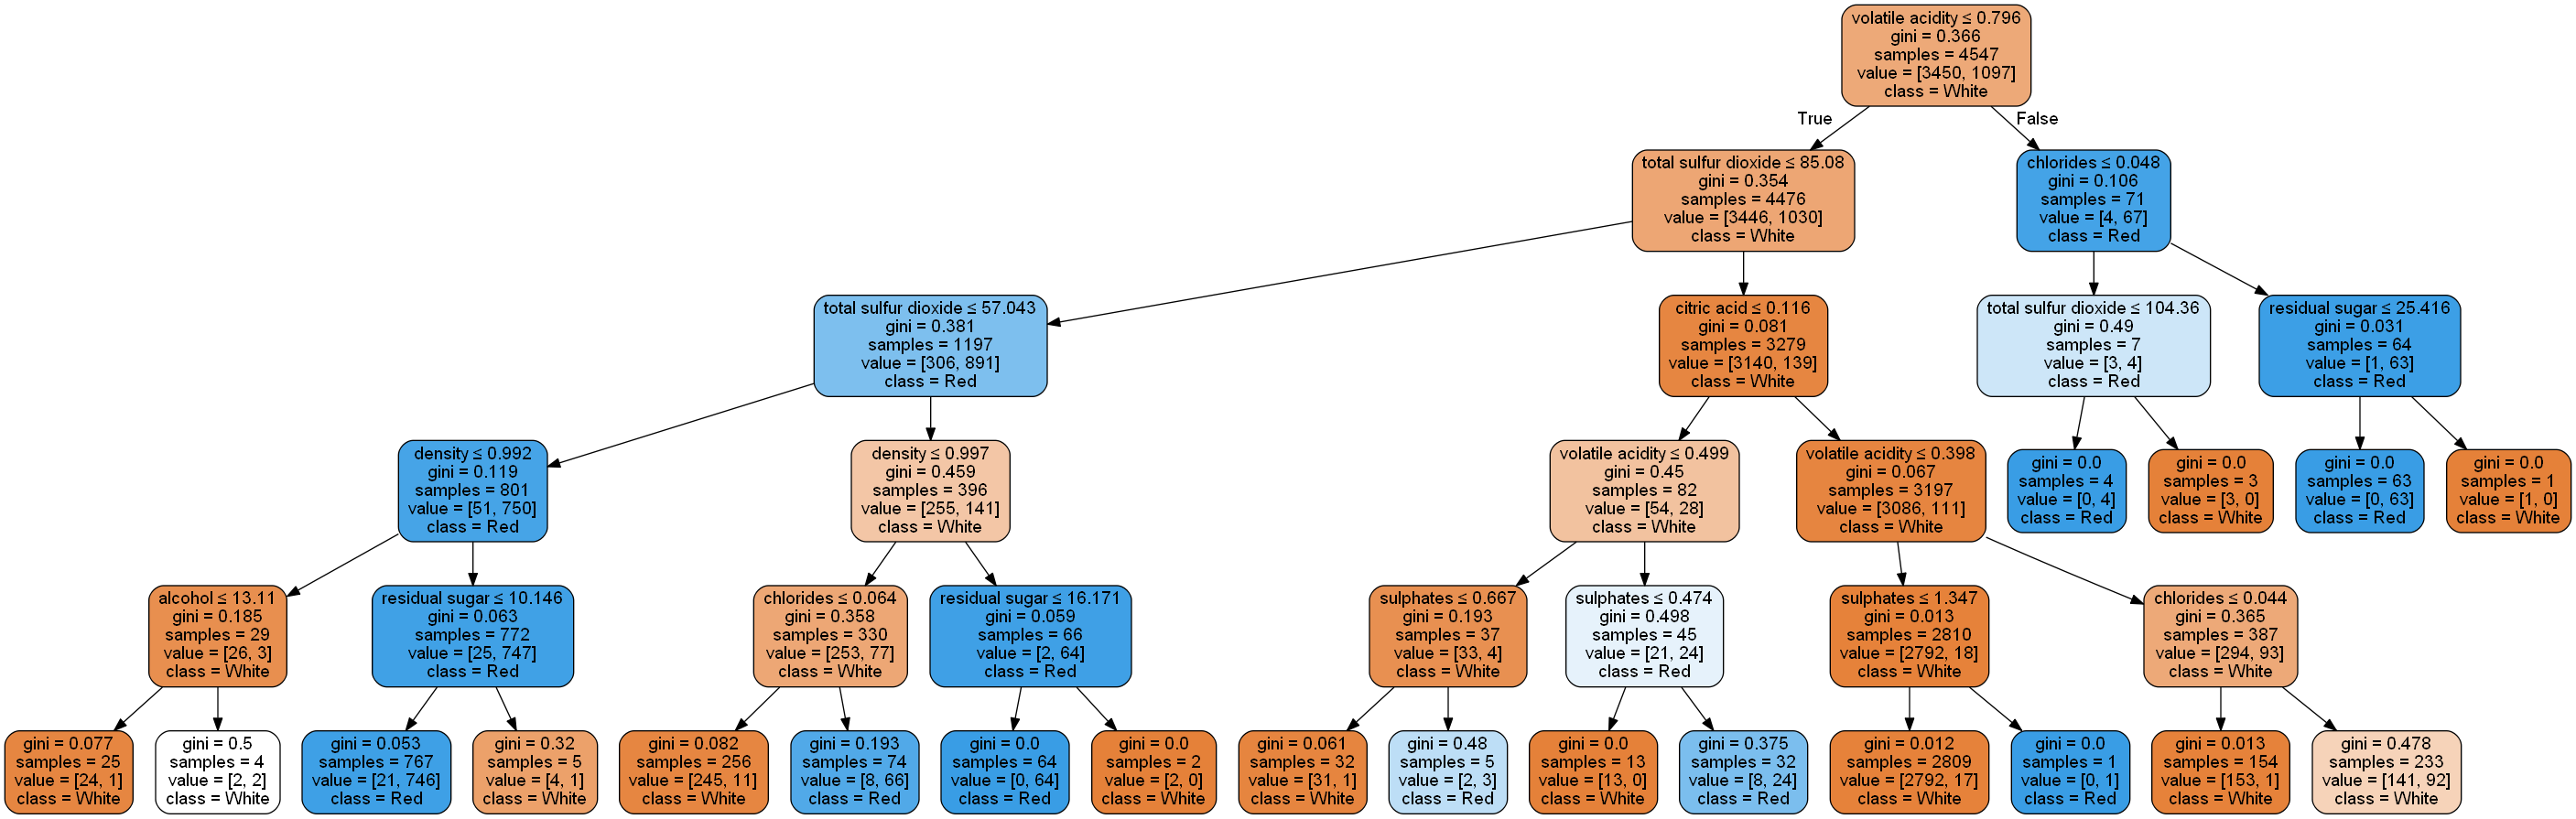

In [11]:
import os
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

os.environ["PATH"] += os.pathsep + r'C:/Program Files (x86)/Graphviz2.38/bin'
dot_data = export_graphviz(wine_tree, out_file=None, feature_names=x_data.columns, class_names=['White', 'Red'], filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())